<a href="https://colab.research.google.com/github/ichaelo/ML-LAB/blob/main/lab4/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4(problem).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

In [2]:
!pip install scikit-learn
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 52.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 56.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27082 sha256=ea5385e885abdde23cabec98d55ce6c5b79e0e319e32a89a8ccec04f7e5d7f94
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
 

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/OnlineRetail.csv", encoding='unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [5]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

'\nПредварительно - оптимизируйте ваш набор данных.\n1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)\n2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)\n3. Скопируйте df в df_cluster # df_cluster = df.copy()\nдалее вы работаете с ним\n4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные\n5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки\n'

In [3]:
# Как много пустых ячейек в разных колонках
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df_drop_customer = df.drop(columns = ["CustomerID"]) # Как видно выше, в этом столбце пусто 135 080 ячеек или 24,92665%
df_drop_customer

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,France


In [9]:
# Столбцы для работы - Quantity, UnitPrice

<Axes: >

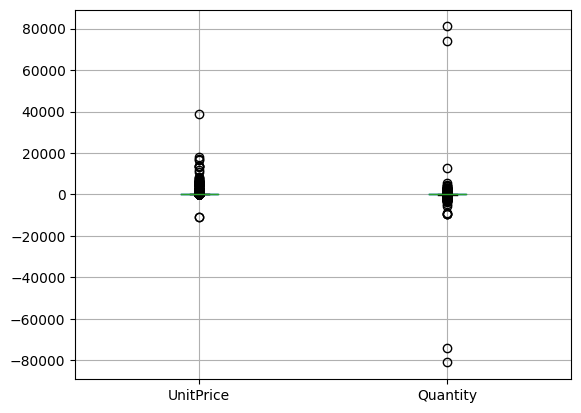

In [6]:
df_drop_customer.boxplot(column=['UnitPrice', 'Quantity'])

Есть выбросы. Как видно, выбросы для Quantity более серьёзные. Суть: найти датафреймы с обработанными выбросами по каждой колонке, затем удалить из обработанного датафрейма по UnitPrice выбросы, которые породит обработанный по Quantity датафрейм

In [7]:
# Optimize dataframe
class Outline:
  def __init__(self, df):
    self.df = df

  def delete_outliers_by_qvartil(self, column_name): # метод из второй лабы
    quan25 = self.df[column_name].quantile(0.25)
    quan75 = self.df[column_name].quantile(0.75)
    quan_diff = quan75 - quan25
    left_border = quan25 - 1.5 * quan_diff
    right_border = quan75 + 1.5 * quan_diff
    return self.df[(self.df[column_name] >=left_border) & (self.df[column_name] <= right_border)] # сразу возвращаем обработанный датафрейм


In [8]:
check_outlier_quantity = Outline(df_drop_customer)
df_outlier_quantity = check_outlier_quantity.delete_outliers_by_qvartil('Quantity')

check_outlier_unitPrice = Outline(df_outlier_quantity) # Уже обрабатываем по другому датафрейму
df_outlier_unitPrice = check_outlier_unitPrice.delete_outliers_by_qvartil('UnitPrice')

df_outlier_unitPrice

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,France


<Axes: >

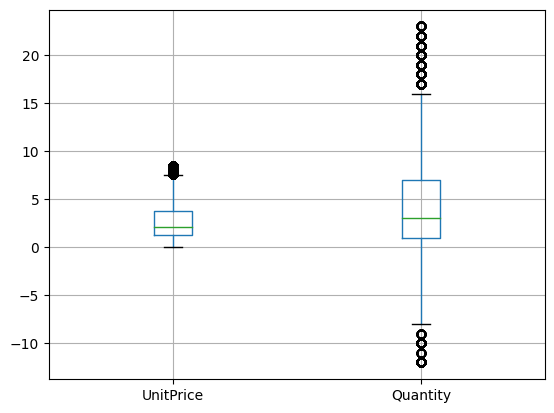

In [9]:
df_outlier_unitPrice.boxplot(column=['UnitPrice', 'Quantity'])

In [10]:
check_outlier_unitPrice_another = Outline(df_outlier_unitPrice) # Уже обрабатываем по другому датафрейму
new_df_outlier_unitPrice = check_outlier_unitPrice_another.delete_outliers_by_qvartil('UnitPrice')

new_df_outlier_unitPrice

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,France


<Axes: >

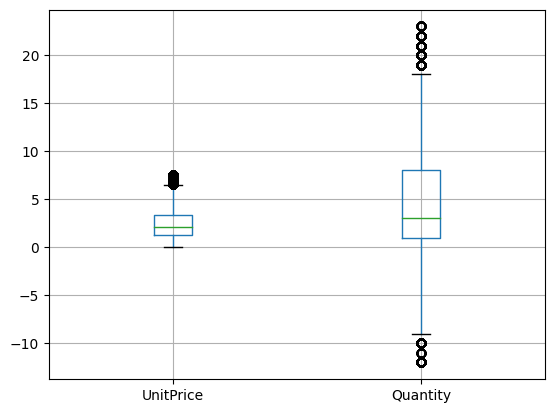

In [11]:
new_df_outlier_unitPrice.boxplot(column=['UnitPrice', 'Quantity']) # вот вроде бы удалил, на 24335 меньше стало, но всё равно есть выбросы :( Продолжу работу

In [12]:
from sklearn.preprocessing import MinMaxScaler

num_features = df.select_dtypes(include=['float64']).columns

df_cluster = new_df_outlier_unitPrice.copy()
# MinMax масштабирование
scaler_minmax = MinMaxScaler() # И тут загвоздка. Я не понял, когда используется MinMaxScaler и StandardScaler.
min_max_scal = scaler_minmax.fit_transform(new_df_outlier_unitPrice[['Quantity','UnitPrice']])
df_cluster[['Quantity','UnitPrice']] = min_max_scal
df_cluster

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0.514286,01-12-2010 08:26,0.340000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,0.514286,01-12-2010 08:26,0.452000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,0.571429,01-12-2010 08:26,0.366667,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,0.514286,01-12-2010 08:26,0.452000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,0.514286,01-12-2010 08:26,0.452000,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,0.685714,09-12-2011 12:50,0.113333,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,0.514286,09-12-2011 12:50,0.280000,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,0.457143,09-12-2011 12:50,0.553333,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,0.457143,09-12-2011 12:50,0.553333,France


Text(0.5, 1.0, 'Распределение данных в двумерном пространстве (обработанный сет)')

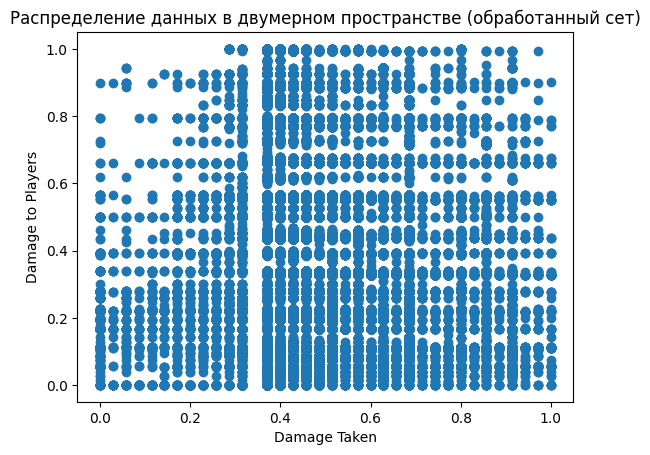

In [13]:
plt.scatter(df_cluster["Quantity"], df_cluster["UnitPrice"])
plt.xlabel('Damage Taken')
plt.ylabel('Damage to Players')
plt.title('Распределение данных в двумерном пространстве (обработанный сет)')

In [18]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""

'\nЗдесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.\n'

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

'''X = df_cluster[['UnitPrice','Quantity']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scores = []
for k in range(2, 4):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    scores.append(score)
print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")
# Визуализация результатов
plt.plot(range(2, 4), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()'''


'X = df_cluster[[\'UnitPrice\',\'Quantity\']]\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)\nscores = []\nfor k in range(2, 4):\n    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)\n    kmeans.fit(X_scaled)\n    score = silhouette_score(X_scaled, kmeans.labels_)\n    scores.append(score)\nprint(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")\n# Визуализация результатов\nplt.plot(range(2, 4), scores)\nplt.xlabel(\'Number of Clusters\')\nplt.ylabel(\'Silhouette Score\')\nplt.show()'

Оптимальное число кластеров 4, с баллом 596799.2516268332


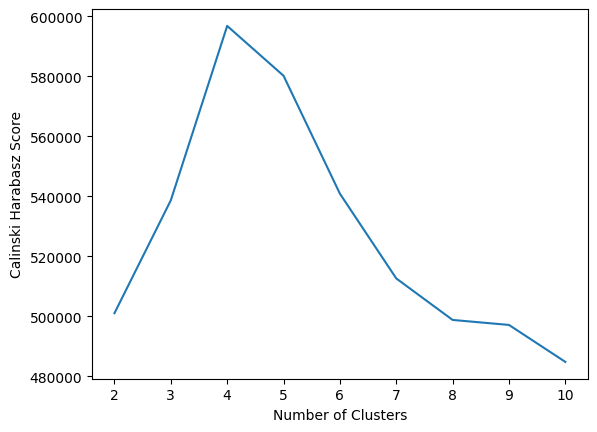

In [16]:
# Внутренняя

from sklearn.metrics import calinski_harabasz_score

X = df_cluster[['Quantity','UnitPrice']]

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit()
    score = calinski_harabasz_score(X, kmeans.labels_)
    scores.append(score)

print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")

# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Calinski Harabasz Score')
plt.show()

Оптимальное число кластеров 4, с баллом 0.6934009334944845


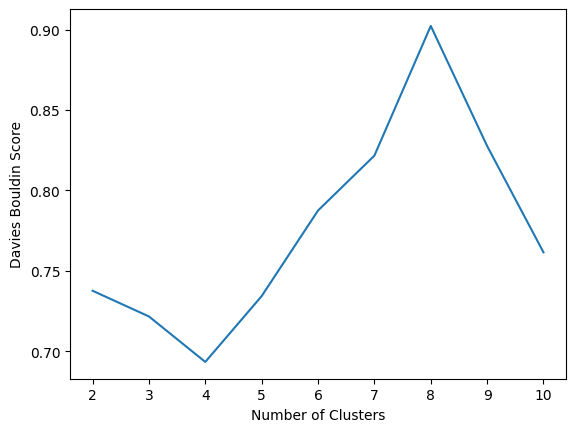

In [15]:
# Внутренняя

from sklearn.metrics import davies_bouldin_score

scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    score = davies_bouldin_score(X, kmeans.labels_)
    scores.append(score)
print(f"Оптимальное число кластеров {scores.index(min(scores)) + 2}, с баллом {min(scores)}")
# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Davies Bouldin Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/l

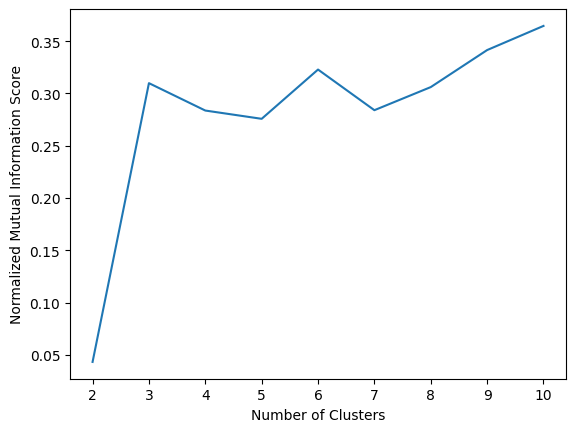

Оптимальное число кластеров 10, с баллом 0.36458939278936303


In [16]:
#Внешняя

from sklearn.metrics import normalized_mutual_info_score

y_true = df_cluster['Quantity'].to_numpy()
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    score = normalized_mutual_info_score(y_true, kmeans.labels_, average_method='arithmetic')
    scores.append(score)

# Визуализация результатов
plt.plot(range(2, 11), scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Normalized Mutual Information Score')
plt.show()

print(f"Оптимальное число кластеров {scores.index(max(scores)) + 2}, с баллом {max(scores)}")

In [23]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

'\nЗдесь визуализация кластеров k-means\n(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)\n'

2 из 3 метрик показали 4, значит оптимальное кол-во кластеров = 4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


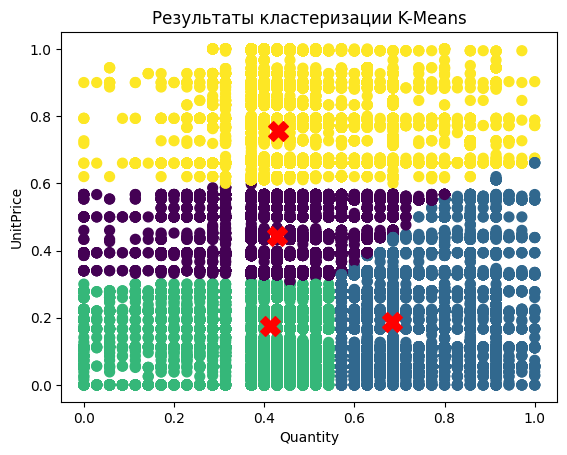

In [18]:


kmeans = KMeans(n_clusters=4)

# Производим кластеризацию данных
kmeans.fit(X)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_

plt.scatter(X["Quantity"], X["UnitPrice"], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Результаты кластеризации K-Means')
plt.show() # Скорее всего где-то что-то пошло не так( (понял, что перепутал датафреймы, исправлено спустя 10 минут раздумий)

In [25]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

'\nЗдесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?\n'

В случае рассчёта оптимального EPS я прождал час и не получил выполнение кода. Буду использовать статичное значение

In [ ]:
from sklearn.cluster import DBSCAN

for eps in [0.52, 0.43, 0.11, 0.89]:
  # Инициализация и обучение модели DBSCAN
  dbscan = DBSCAN(eps=eps, min_samples=3)
  dbscan.fit(X)
  labels = dbscan.labels_

  # Визуализация результатов, темные точки - выбросы
  plt.scatter(X["Quantity"], X["UnitPrice"], c=labels, cmap='viridis')
  plt.title(f'DBSCAN Clustering, eps = {round(eps, 2)}')
  plt.show() # Ломается, предположу что из-за большого объёма данных, что делать?

In [ ]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
"""
Здесь иерархическая кластеризация и метрики
"""

In [ ]:
# Используем внутреннюю метрику

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
score_agg = []
for k in range(2,11):
  cluster_model = AgglomerativeClustering(n_clusters=k)

  clusters = cluster_model.fit(X) # Опять ломается(

  score_agg.append(davies_bouldin_score(min_max_scal,kmeans.labels_,metric='euclidean'))
print(f"Оптимальное число кластеров Davies Bouldin {score_agg.index(max(score_agg)) + 2}, с баллом {max(score_agg)}")

In [ ]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

In [ ]:
# your_code here

In [ ]:
!pip install ydata-profiling

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [ ]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



In [ ]:
# your_code here